In [2]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [3]:
# Load the dataset
data = pd.read_csv(r"C:\Users\gopal\Desktop\PICT\#4 Year\SEM1\LP3\final practical\data\uber.csv")

print("Dataset Shape:", data.shape)
print("\nFirst few rows:")
data.head()

Dataset Shape: (200000, 9)

First few rows:


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
# Dataset Information
print("Dataset Info:")
data.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [5]:
# Statistical Summary
print("Statistical Summary:")
data.describe()

Statistical Summary:


,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [6]:
# Check missing values
print("Missing Values:")
missing_values = data.isnull().sum()
print(missing_values)
print("\nPercentage of Missing Values:")
print((missing_values / len(data)) * 100)

Missing Values:
Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

Percentage of Missing Values:
Unnamed: 0           0.0000
key                  0.0000
fare_amount          0.0000
pickup_datetime      0.0000
pickup_longitude     0.0000
pickup_latitude      0.0000
dropoff_longitude    0.0005
dropoff_latitude     0.0005
passenger_count      0.0000
dtype: float64


In [7]:
# Drop rows with missing values
print(f"Records before dropping missing values: {len(data)}")
data = data.dropna()
print(f"Records after dropping missing values: {len(data)}")
print(f"\nMissing values after cleanup:")
print(data.isnull().sum())

Records before dropping missing values: 200000
Records after dropping missing values: 199999

Missing values after cleanup:
Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


In [8]:
# Check data types
print("Data Types Before Conversion:")
print(data.dtypes)

Data Types Before Conversion:
Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object


In [9]:
# Convert pickup_datetime to datetime format
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])

# Extract time-based features
data['hour'] = data['pickup_datetime'].dt.hour
data['day'] = data['pickup_datetime'].dt.day
data['month'] = data['pickup_datetime'].dt.month
data['year'] = data['pickup_datetime'].dt.year
data['day_of_week'] = data['pickup_datetime'].dt.dayofweek

print("Extracted Features:")
data[['pickup_datetime', 'hour', 'day', 'month', 'year', 'day_of_week']].head()

Extracted Features:


,pickup_datetime,hour,day,month,year,day_of_week
0,2015-05-07 19:52:06+00:00,19,7,5,2015,3
1,2009-07-17 20:04:56+00:00,20,17,7,2009,4
2,2009-08-24 21:45:00+00:00,21,24,8,2009,0
3,2009-06-26 08:22:21+00:00,8,26,6,2009,4
4,2014-08-28 17:47:00+00:00,17,28,8,2014,3


In [10]:
# Haversine formula to calculate distance between two points on Earth
def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    Returns distance in kilometers
    """
    R = 6371  # Radius of Earth in kilometers
    
    # Convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    
    return R * c

# Calculate distance
data['distance_km'] = haversine(
    data['pickup_latitude'], 
    data['pickup_longitude'],
    data['dropoff_latitude'], 
    data['dropoff_longitude']
)

print("Distance Feature Added:")
data[['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'distance_km']].head()

Distance Feature Added:


,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,distance_km
0,40.738354,-73.999817,40.723217,-73.999512,1.683323
1,40.728225,-73.994355,40.750325,-73.994710,2.457590
2,40.740770,-74.005043,40.772647,-73.962565,5.036377
3,40.790844,-73.976124,40.803349,-73.965316,1.661683
4,40.744085,-73.925023,40.761247,-73.973082,4.475450


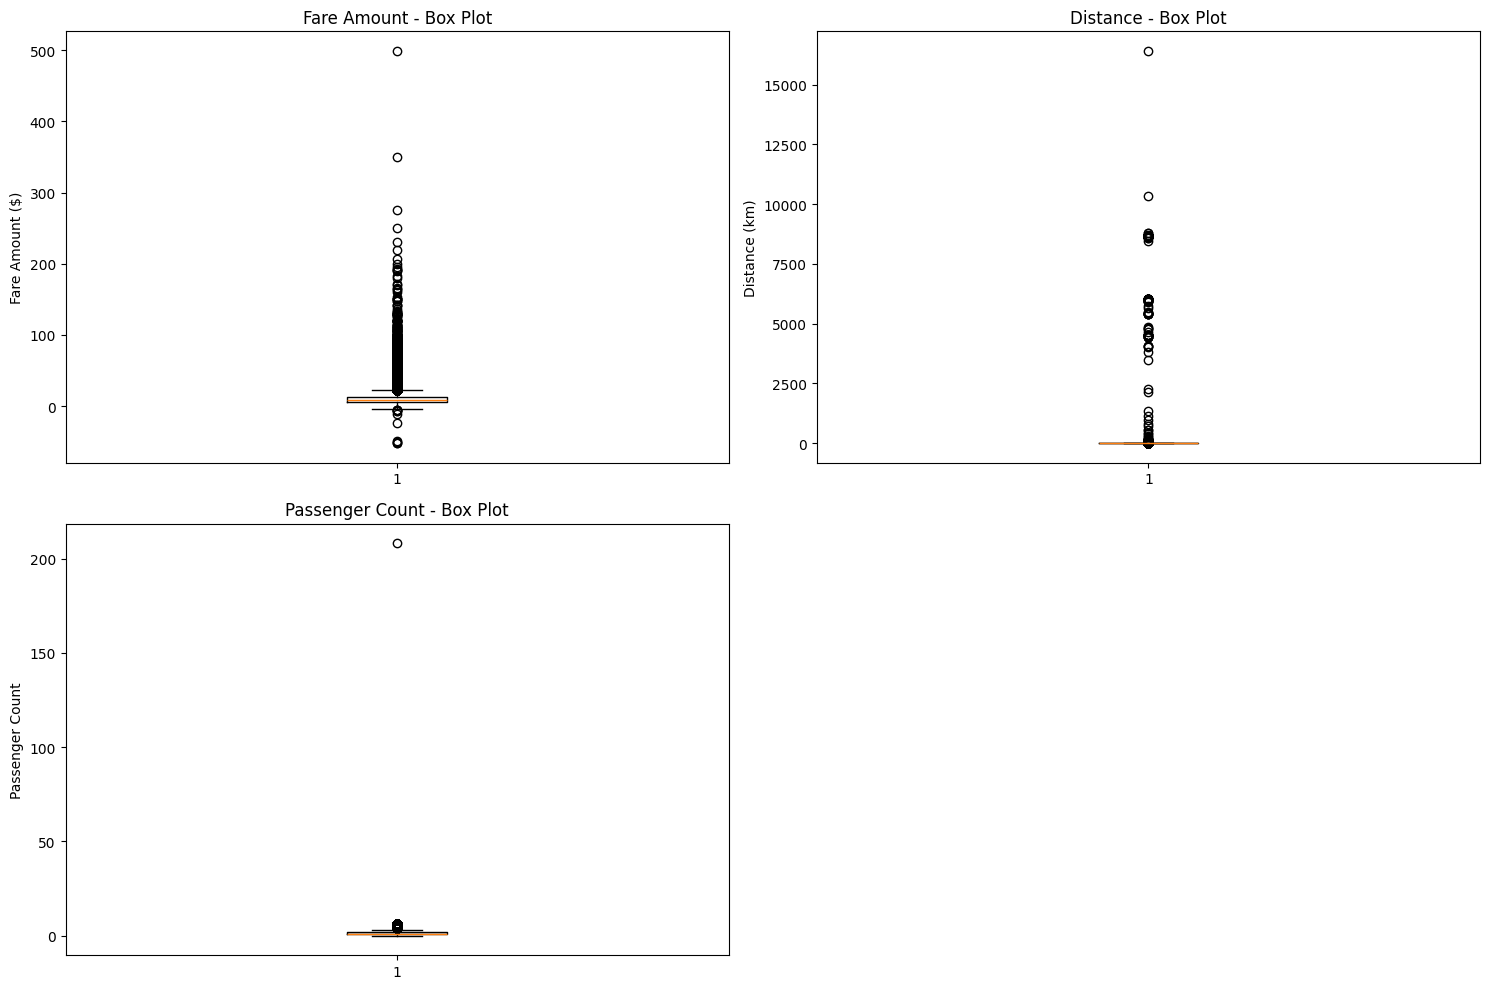

In [11]:
# Visualize outliers for key numerical features
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Fare Amount
axes[0, 0].boxplot(data['fare_amount'])
axes[0, 0].set_title('Fare Amount - Box Plot')
axes[0, 0].set_ylabel('Fare Amount ($)')

# Distance
axes[0, 1].boxplot(data['distance_km'])
axes[0, 1].set_title('Distance - Box Plot')
axes[0, 1].set_ylabel('Distance (km)')

# Passenger Count
axes[1, 0].boxplot(data['passenger_count'])
axes[1, 0].set_title('Passenger Count - Box Plot')
axes[1, 0].set_ylabel('Passenger Count')

# Hide the empty subplot
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

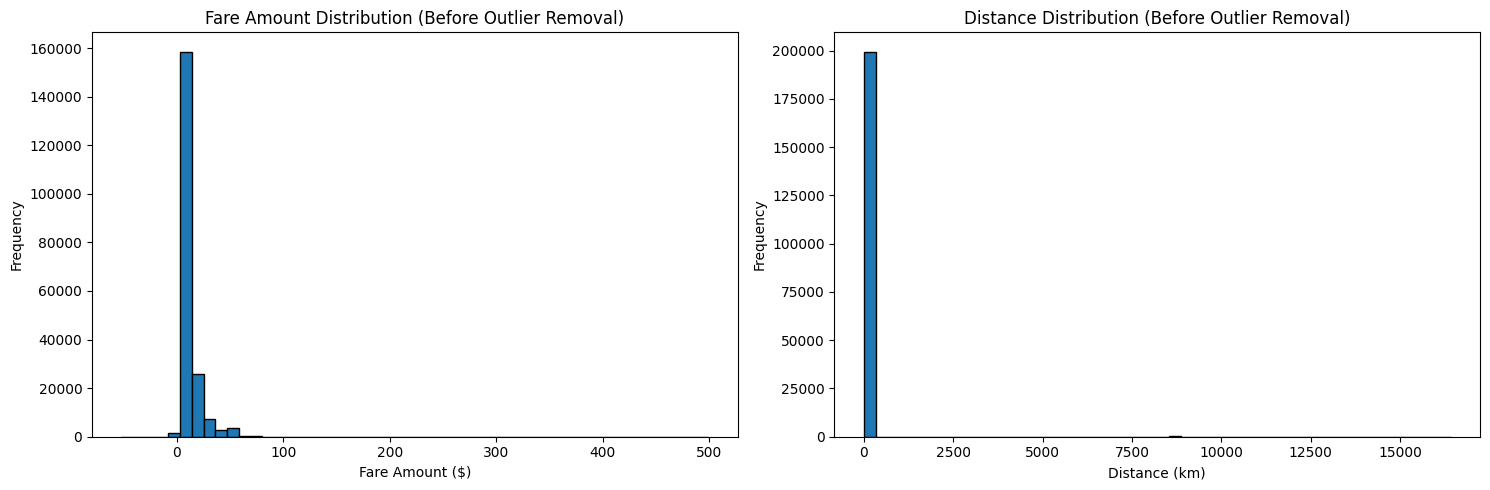

In [12]:
# Distribution plots before outlier removal
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(data['fare_amount'], bins=50, edgecolor='black')
axes[0].set_title('Fare Amount Distribution (Before Outlier Removal)')
axes[0].set_xlabel('Fare Amount ($)')
axes[0].set_ylabel('Frequency')

axes[1].hist(data['distance_km'], bins=50, edgecolor='black')
axes[1].set_title('Distance Distribution (Before Outlier Removal)')
axes[1].set_xlabel('Distance (km)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [13]:
# Print statistics before outlier removal
print("Statistics Before Outlier Removal:")
print(f"Total Records: {len(data)}")
print(f"\nFare Amount:")
print(f"  Min: ${data['fare_amount'].min():.2f}")
print(f"  Max: ${data['fare_amount'].max():.2f}")
print(f"  Mean: ${data['fare_amount'].mean():.2f}")
print(f"  Median: ${data['fare_amount'].median():.2f}")

print(f"\nDistance:")
print(f"  Min: {data['distance_km'].min():.2f} km")
print(f"  Max: {data['distance_km'].max():.2f} km")
print(f"  Mean: {data['distance_km'].mean():.2f} km")
print(f"  Median: {data['distance_km'].median():.2f} km")

Statistics Before Outlier Removal:
Total Records: 199999

Fare Amount:
  Min: $-52.00
  Max: $499.00
  Mean: $11.36
  Median: $8.50

Distance:
  Min: 0.00 km
  Max: 16409.24 km
  Mean: 20.86 km
  Median: 2.12 km


In [ ]:
# Remove outliers based on domain knowledge
print(f"Records before outlier removal: {len(data)}")

original_count = len(data)

# Remove negative and unrealistic fare amounts
data = data[(data['fare_amount'] > 0) & (data['fare_amount'] < 300)]

# Remove unrealistic distances (0 km or too large)
data = data[(data['distance_km'] > 0) & (data['distance_km'] < 100)]

# Remove invalid passenger counts
data = data[(data['passenger_count'] > 0) & (data['passenger_count'] <= 6)]

# Remove outliers using coordinates (NYC boundaries approximately)
data = data[(data['pickup_latitude'] > 40) & (data['pickup_latitude'] < 42)]
data = data[(data['pickup_longitude'] > -75) & (data['pickup_longitude'] < -72)]
data = data[(data['dropoff_latitude'] > 40) & (data['dropoff_latitude'] < 42)]
data = data[(data['dropoff_longitude'] > -75) & (data['dropoff_longitude'] < -72)]

print(f"Records after outlier removal: {len(data)}")
print(f"Outliers removed: {original_count - len(data)}")
print(f"Percentage removed: {((original_count - len(data)) / original_count * 100):.2f}%")

Records before outlier removal: 199999
Records after outlier removal: 193058
Outliers removed: 6941
Percentage removed: 3.47%


In [15]:
# Print statistics after outlier removal
print("Statistics After Outlier Removal:")
print(f"Total Records: {len(data)}")
print(f"\nFare Amount:")
print(f"  Min: ${data['fare_amount'].min():.2f}")
print(f"  Max: ${data['fare_amount'].max():.2f}")
print(f"  Mean: ${data['fare_amount'].mean():.2f}")
print(f"  Median: ${data['fare_amount'].median():.2f}")

print(f"\nDistance:")
print(f"  Min: {data['distance_km'].min():.2f} km")
print(f"  Max: {data['distance_km'].max():.2f} km")
print(f"  Mean: {data['distance_km'].mean():.2f} km")
print(f"  Median: {data['distance_km'].median():.2f} km")

Statistics After Outlier Removal:
Total Records: 193058

Fare Amount:
  Min: $0.01
  Max: $230.00
  Mean: $11.35
  Median: $8.50

Distance:
  Min: 0.00 km
  Max: 99.16 km
  Mean: 3.36 km
  Median: 2.18 km


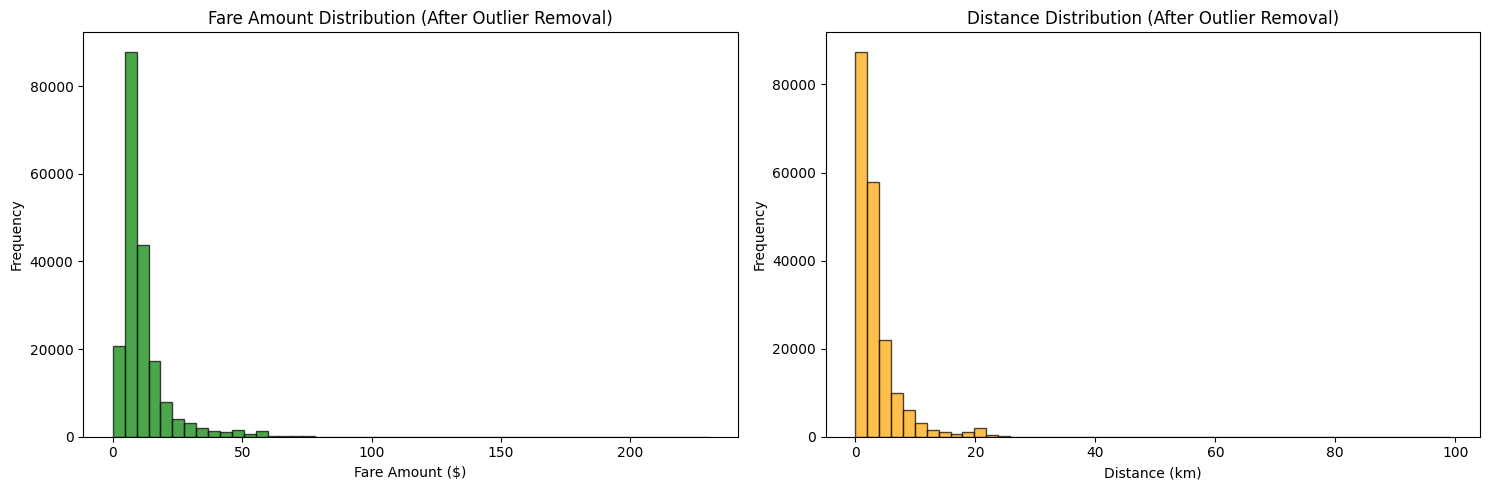

In [16]:
# Distribution plots after outlier removal
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(data['fare_amount'], bins=50, edgecolor='black', color='green', alpha=0.7)
axes[0].set_title('Fare Amount Distribution (After Outlier Removal)')
axes[0].set_xlabel('Fare Amount ($)')
axes[0].set_ylabel('Frequency')

axes[1].hist(data['distance_km'], bins=50, edgecolor='black', color='orange', alpha=0.7)
axes[1].set_title('Distance Distribution (After Outlier Removal)')
axes[1].set_xlabel('Distance (km)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [17]:
# Select numerical features for correlation analysis
correlation_features = ['fare_amount', 'distance_km', 'passenger_count', 'hour', 'day', 'month', 'year', 'day_of_week']
correlation_data = data[correlation_features]

# Calculate correlation matrix
correlation_matrix = correlation_data.corr()

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                 fare_amount  distance_km  passenger_count      hour  \
fare_amount         1.000000     0.846960         0.012046 -0.020409   
distance_km         0.846960     1.000000         0.007421 -0.030409   
passenger_count     0.012046     0.007421         1.000000  0.014876   
hour               -0.020409    -0.030409         0.014876  1.000000   
day                 0.000197     0.000775         0.002413  0.005546   
month               0.024582     0.011931         0.008867 -0.004321   
year                0.121372     0.022504         0.005143  0.001930   
day_of_week         0.005796     0.016553         0.036276 -0.086011   

                      day     month      year  day_of_week  
fare_amount      0.000197  0.024582  0.121372     0.005796  
distance_km      0.000775  0.011931  0.022504     0.016553  
passenger_count  0.002413  0.008867  0.005143     0.036276  
hour             0.005546 -0.004321  0.001930    -0.086011  
day              1.000000 

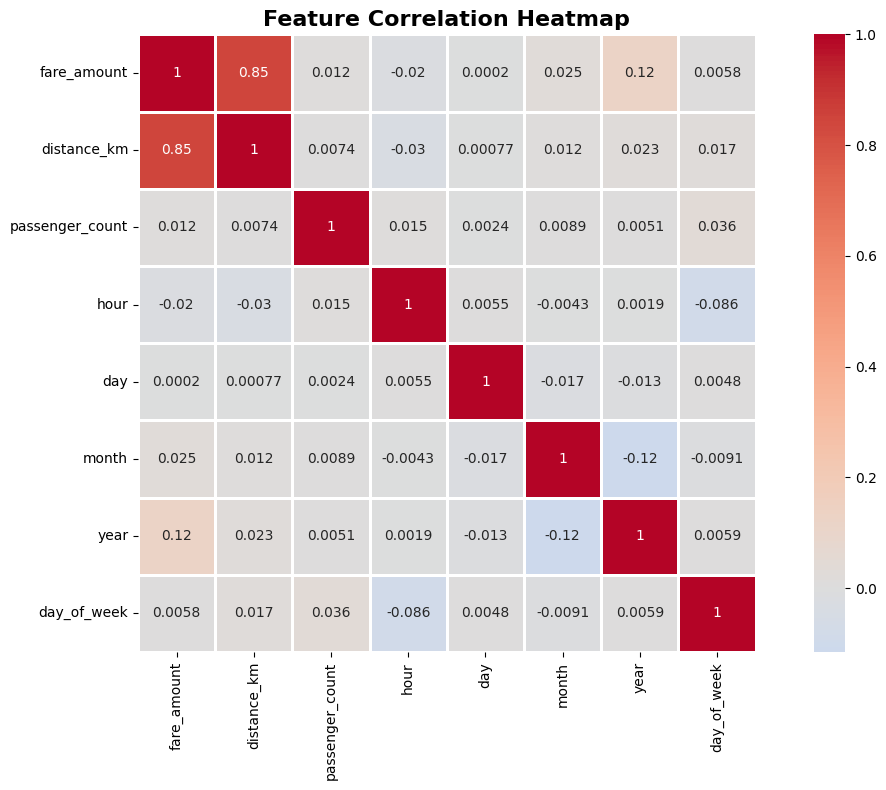

In [19]:
# Visualize correlation matrix using heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1)
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

Correlation with Fare Amount:
fare_amount        1.000000
distance_km        0.846960
year               0.121372
month              0.024582
passenger_count    0.012046
day_of_week        0.005796
day                0.000197
hour              -0.020409
Name: fare_amount, dtype: float64


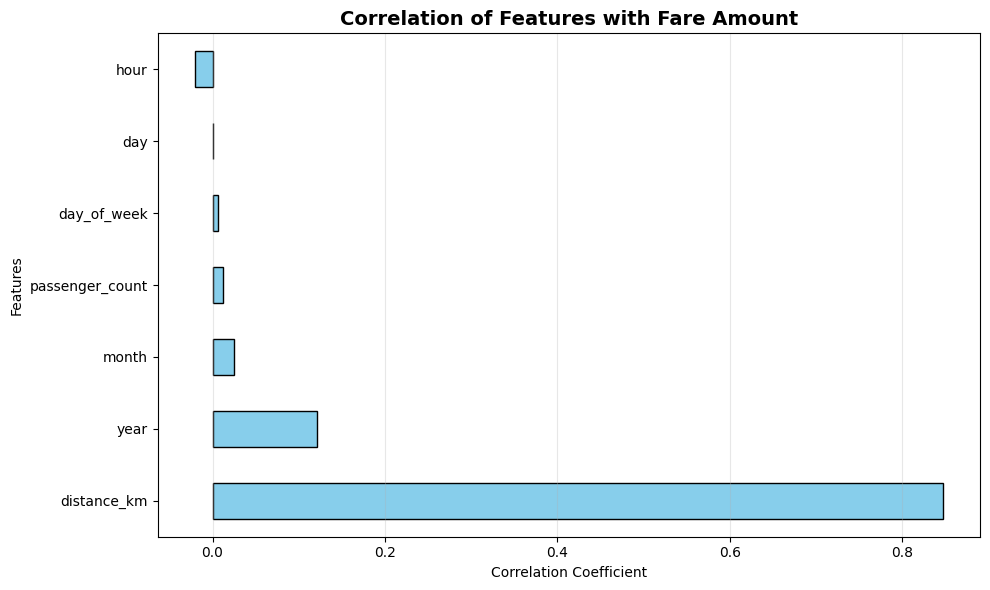

In [23]:
# Correlation with target variable (fare_amount)
target_correlation = correlation_matrix['fare_amount'].sort_values(ascending=False)
print("Correlation with Fare Amount:")
print(target_correlation)

# Visualize correlation with target
plt.figure(figsize=(10, 6))
target_correlation.drop('fare_amount').plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Correlation of Features with Fare Amount', fontsize=14, fontweight='bold')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

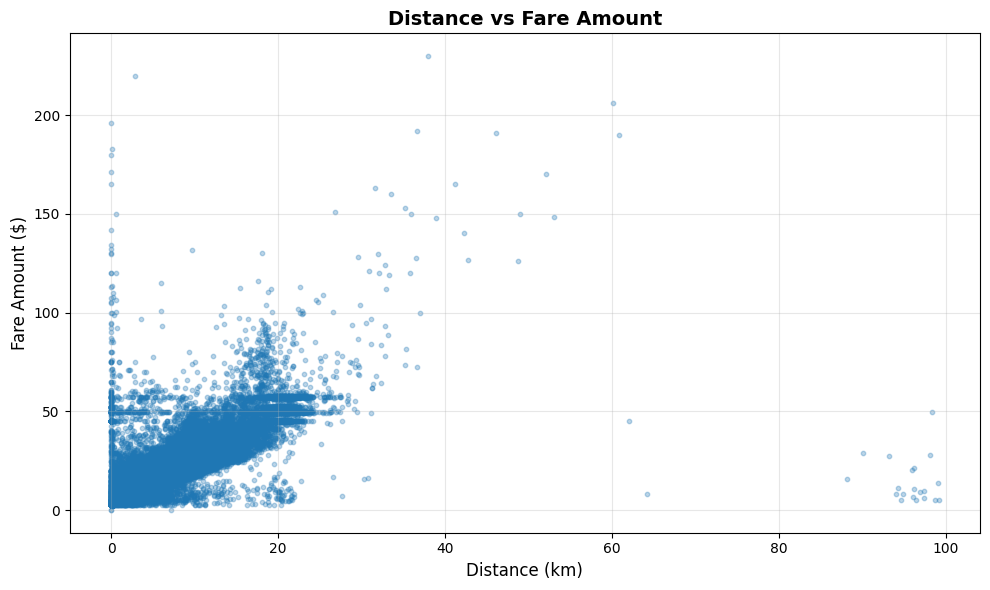

In [21]:
# Scatter plot: Distance vs Fare Amount
plt.figure(figsize=(10, 6))
plt.scatter(data['distance_km'], data['fare_amount'], alpha=0.3, s=10)
plt.xlabel('Distance (km)', fontsize=12)
plt.ylabel('Fare Amount ($)', fontsize=12)
plt.title('Distance vs Fare Amount', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

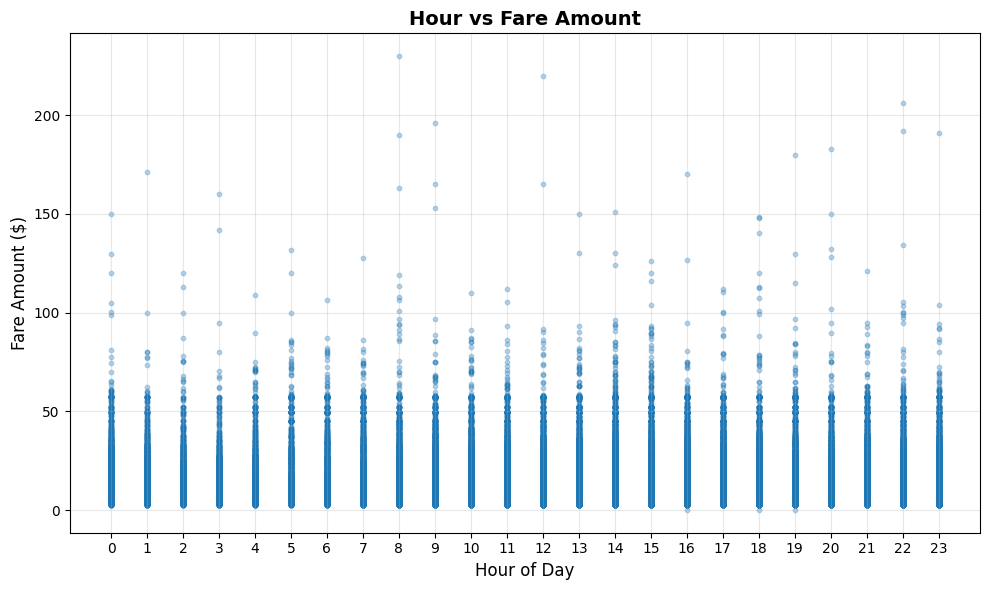

In [24]:
# Scatter plot: Hour vs Fare Amount
plt.figure(figsize=(10, 6))
plt.scatter(data['hour'], data['fare_amount'], alpha=0.3, s=10)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Fare Amount ($)', fontsize=12)
plt.title('Hour vs Fare Amount', fontsize=14, fontweight='bold')
plt.xticks(range(0, 24))
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [25]:
# Select features for modeling
feature_columns = ['distance_km', 'passenger_count', 'hour', 'day', 'month', 'year', 'day_of_week']
X = data[feature_columns]
y = data['fare_amount']

print("Feature Matrix Shape:", X.shape)
print("Target Vector Shape:", y.shape)
print("\nFeatures:")
print(X.head())

Feature Matrix Shape: (193058, 7)
Target Vector Shape: (193058,)

Features:
   distance_km  passenger_count  hour  day  month  year  day_of_week
0     1.683323                1    19    7      5  2015            3
1     2.457590                1    20   17      7  2009            4
2     5.036377                1    21   24      8  2009            0
3     1.661683                3     8   26      6  2009            4
4     4.475450                5    17   28      8  2014            3


In [26]:
# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Set:")
print(f"  X_train shape: {X_train.shape}")
print(f"  y_train shape: {y_train.shape}")
print("\nTesting Set:")
print(f"  X_test shape: {X_test.shape}")
print(f"  y_test shape: {y_test.shape}")

Training Set:
  X_train shape: (154446, 7)
  y_train shape: (154446,)

Testing Set:
  X_test shape: (38612, 7)
  y_test shape: (38612,)


In [27]:
# Initialize and train Linear Regression model
print("Training Linear Regression Model...")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
print("Linear Regression Model Training Completed!")

# Make predictions
y_pred_lr = lr_model.predict(X_test)

print("\nModel Coefficients:")
for feature, coef in zip(feature_columns, lr_model.coef_):
    print(f"  {feature}: {coef:.4f}")
print(f"\nIntercept: {lr_model.intercept_:.4f}")

Training Linear Regression Model...
Linear Regression Model Training Completed!

Model Coefficients:
  distance_km: 2.1932
  passenger_count: 0.0329
  hour: 0.0063
  day: 0.0019
  month: 0.0733
  year: 0.5498
  day_of_week: -0.0374

Intercept: -1102.6758


In [28]:
# Initialize and train Random Forest Regression model
print("Training Random Forest Regression Model...")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1, max_depth=20)
rf_model.fit(X_train, y_train)
print("Random Forest Regression Model Training Completed!")

# Make predictions
y_pred_rf = rf_model.predict(X_test)

print("\nFeature Importance:")
feature_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

Training Random Forest Regression Model...
Random Forest Regression Model Training Completed!

Feature Importance:
           Feature  Importance
0      distance_km    0.860661
2             hour    0.031768
5             year    0.031643
3              day    0.029475
4            month    0.022150
6      day_of_week    0.016516
1  passenger_count    0.007786


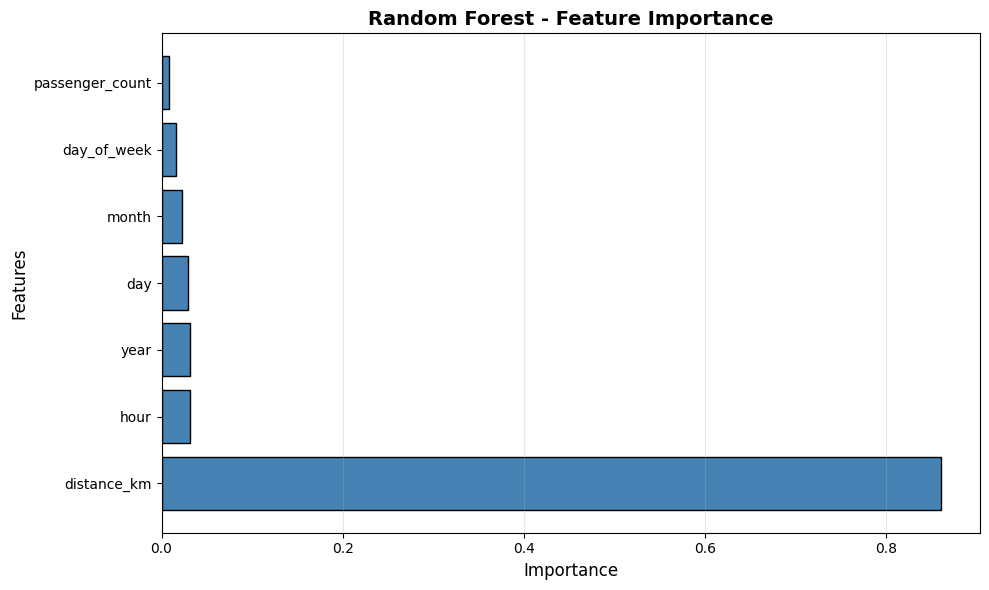

In [29]:
# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='steelblue', edgecolor='black')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Random Forest - Feature Importance', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [30]:
# Function to calculate all metrics
def calculate_metrics(y_true, y_pred, model_name):
    """
    Calculate and display regression metrics
    """
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n{'='*50}")
    print(f"{model_name} Performance Metrics")
    print(f"{'='*50}")
    print(f"R² Score:                    {r2:.6f}")
    print(f"Mean Squared Error (MSE):    ${mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): ${rmse:.4f}")
    print(f"Mean Absolute Error (MAE):   ${mae:.4f}")
    print(f"{'='*50}")
    
    return {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2': r2}

In [31]:
# Evaluate Linear Regression
lr_metrics = calculate_metrics(y_test, y_pred_lr, "Linear Regression")


Linear Regression Performance Metrics
R² Score:                    0.731096
Mean Squared Error (MSE):    $24.5477
Root Mean Squared Error (RMSE): $4.9546
Mean Absolute Error (MAE):   $2.3025


In [32]:
# Evaluate Random Forest Regression
rf_metrics = calculate_metrics(y_test, y_pred_rf, "Random Forest Regression")


Random Forest Regression Performance Metrics
R² Score:                    0.799307
Mean Squared Error (MSE):    $18.3208
Root Mean Squared Error (RMSE): $4.2803
Mean Absolute Error (MAE):   $2.1242
